In [33]:
import credentials as cd
from fyers_apiv3 import fyersModel
import pandas as pd
import datetime as dt

In [34]:
with open("access.txt", "r") as a:
    access_token = a.read()
client_id = cd.client_id

# Initialize the FyersModel instance with your client_id, access_token, and enable async mode
fyers = fyersModel.FyersModel(
    client_id=client_id, is_async=False, token=access_token, log_path=""
)

In [35]:
# now_epoch = int(dt.datetime.now().timestamp())
# prev_epoch = int((dt.datetime.now() - dt.timedelta(days=5)).timestamp())
# print(now_epoch)
# print(prev_epoch)


# now_date = dt.datetime.now()
# prev_date = dt.datetime.now() - dt.timedelta(days=5)
# print(now_date)
# print(prev_date)

In [36]:
data = {
    "symbol": "NSE:NIFTY50-INDEX",
    "resolution": "5",
    "date_format": "1",
    "range_from": "2024-04-01",
    "range_to": "2024-05-30",
    "cont_flag": "1",
}

In [37]:
response = fyers.history(data=data)
print(response)
data = response["candles"]
df = pd.DataFrame(data)
print(df)

{'candles': [[1711943100, 22455, 22514.05, 22443.35, 22511.75, 0], [1711943400, 22512.55, 22514.6, 22485.5, 22500.95, 0], [1711943700, 22502.3, 22519, 22489.05, 22493.85, 0], [1711944000, 22493.75, 22512.5, 22492.1, 22510.1, 0], [1711944300, 22510.4, 22529.95, 22507.75, 22508, 0], [1711944600, 22505, 22508.7, 22466.7, 22482.6, 0], [1711944900, 22483.25, 22493.85, 22475.9, 22487.1, 0], [1711945200, 22488.5, 22506.4, 22488.25, 22502.6, 0], [1711945500, 22503.5, 22523.3, 22499.55, 22520.05, 0], [1711945800, 22519.6, 22524.4, 22501.55, 22502.3, 0], [1711946100, 22502.55, 22508.6, 22496.85, 22499.5, 0], [1711946400, 22499.65, 22508.95, 22495.3, 22503.65, 0], [1711946700, 22503.8, 22511.15, 22502.2, 22506.8, 0], [1711947000, 22506.4, 22512.75, 22488.3, 22508.55, 0], [1711947300, 22507.95, 22509.45, 22497.7, 22500.05, 0], [1711947600, 22500.35, 22502.9, 22488.75, 22499.6, 0], [1711947900, 22500.1, 22506.5, 22492.65, 22493.95, 0], [1711948200, 22494.6, 22500.65, 22489.4, 22492.1, 0], [17119485

In [38]:
df.columns = ["date", "open", "high", "low", "close", "volume"]
df["date"] = pd.to_datetime(df["date"], unit="s")

df.date = df.date.dt.tz_localize("UTC").dt.tz_convert("Asia/Kolkata")
print(df)
df["date"] = df["date"].dt.tz_localize(None)
df = df.set_index("date")

print(df)
df.to_csv("data.csv")
print(dt.datetime.now())

                          date      open      high       low     close  volume
0    2024-04-01 09:15:00+05:30  22455.00  22514.05  22443.35  22511.75       0
1    2024-04-01 09:20:00+05:30  22512.55  22514.60  22485.50  22500.95       0
2    2024-04-01 09:25:00+05:30  22502.30  22519.00  22489.05  22493.85       0
3    2024-04-01 09:30:00+05:30  22493.75  22512.50  22492.10  22510.10       0
4    2024-04-01 09:35:00+05:30  22510.40  22529.95  22507.75  22508.00       0
...                        ...       ...       ...       ...       ...     ...
2545 2024-05-18 15:05:00+05:30  22506.80  22506.80  22506.80  22506.80       0
2546 2024-05-18 15:10:00+05:30  22506.80  22506.80  22506.80  22506.80       0
2547 2024-05-18 15:15:00+05:30  22506.80  22506.80  22506.80  22506.80       0
2548 2024-05-18 15:20:00+05:30  22506.80  22506.80  22506.80  22506.80       0
2549 2024-05-18 15:25:00+05:30  22506.80  22506.80  22506.80  22506.80       0

[2550 rows x 6 columns]
                         op

C:\Users\Shiva Kumar G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\Shiva Kumar G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\mplfinance\plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


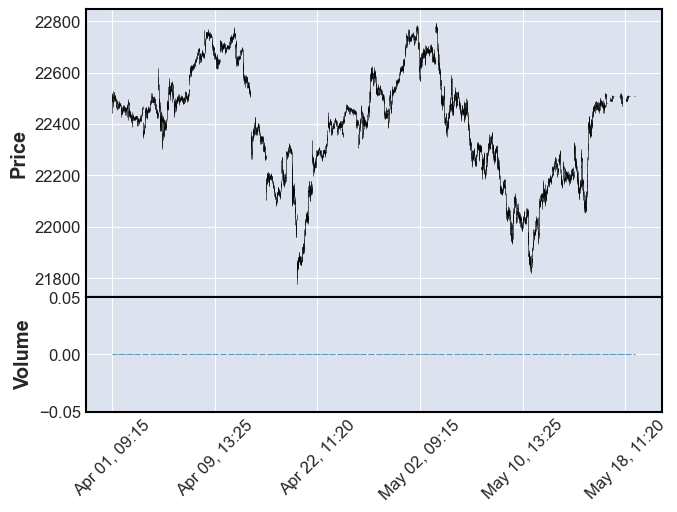

In [39]:
import mplfinance as mpf

# Plotting the candlestick chart
mpf.plot(df, type="candle", volume=True)

In [40]:
import numpy as np


# Strategy to buy and sell based on the EMA crossover, fast EMA = 9, slow EMA = 13

df["fast_ema"] = df["close"].ewm(span=9, adjust=False).mean()
df["slow_ema"] = df["close"].ewm(span=13, adjust=False).mean()

df.tail()

,open,high,low,close,volume,fast_ema,slow_ema
date,,,,,,,
2024-05-18 15:05:00,22506.8,22506.8,22506.8,22506.8,0,22506.794011,22506.728923
2024-05-18 15:10:00,22506.8,22506.8,22506.8,22506.8,0,22506.795209,22506.739077
2024-05-18 15:15:00,22506.8,22506.8,22506.8,22506.8,0,22506.796167,22506.747780
2024-05-18 15:20:00,22506.8,22506.8,22506.8,22506.8,0,22506.796934,22506.755240
2024-05-18 15:25:00,22506.8,22506.8,22506.8,22506.8,0,22506.797547,22506.761634


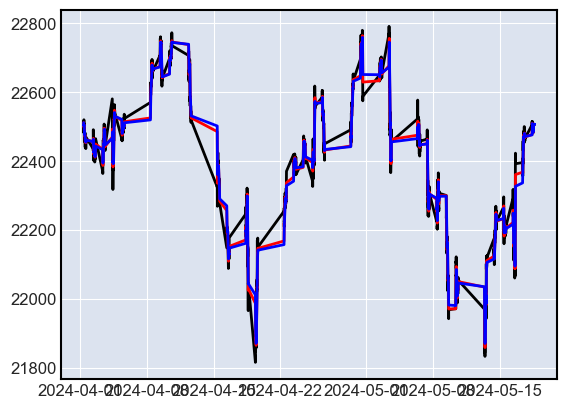

In [41]:
# draw plot 

plt.plot(df["close"], label="Close Price", color="black")
plt.plot(df["fast_ema"], label="Fast EMA", color="red")
plt.plot(df["slow_ema"], label="Slow EMA", color="blue")
plt.show()

In [42]:
# define entries 

df['Long'] = df.fast_ema > df.slow_ema
df.tail()

,open,high,low,close,volume,fast_ema,slow_ema,Long
date,,,,,,,,
2024-05-18 15:05:00,22506.8,22506.8,22506.8,22506.8,0,22506.794011,22506.728923,True
2024-05-18 15:10:00,22506.8,22506.8,22506.8,22506.8,0,22506.795209,22506.739077,True
2024-05-18 15:15:00,22506.8,22506.8,22506.8,22506.8,0,22506.796167,22506.747780,True
2024-05-18 15:20:00,22506.8,22506.8,22506.8,22506.8,0,22506.796934,22506.755240,True
2024-05-18 15:25:00,22506.8,22506.8,22506.8,22506.8,0,22506.797547,22506.761634,True


In [43]:
# # due to API restriction, data can't fetched for more than 60 days at a time, so we need to fetch data in chunks of 60 days and then concatenate them to get the complete data
# def fetchOHLC(ticker, interval, duration):
#     """extracts historical data and outputs in the form of dataframe"""
#     instrument = ticker
#     data = {
#         "symbol": instrument,
#         "resolution": interval,
#         "date_format": "1",
#         "range_from": dt.date.today() - dt.timedelta(duration),
#         "range_to": dt.date.today(),
#         "cont_flag": "1",
#     }
#     sdata = fyers.history(data)
#     sdata = pd.DataFrame(sdata["candles"])
#     sdata.columns = ["date", "open", "high", "low", "close", "volume"]
#     sdata["date"] = pd.to_datetime(sdata["date"], unit="s")
#     sdata.date = sdata.date.dt.tz_localize("UTC").dt.tz_convert("Asia/Kolkata")
#     sdata["date"] = sdata["date"].dt.tz_localize(None)
#     sdata = sdata.set_index("date")
#     return sdata


# ticker = "NSE:NIFTYBANK-INDEX"
# data = fetchOHLC(ticker, "D", 60)
# print(data)


# def gethistory(symbol1, type, duration):
#     symbol = "NSE:" + symbol1 + "-" + type
#     start = dt.date.today() - dt.timedelta(duration)
#     end = dt.date.today() - dt.timedelta()
#     sdata = pd.DataFrame()
#     while start <= end:
#         end2 = start + dt.timedelta(60)
#         data = {
#             "symbol": symbol,
#             "resolution": "1",
#             "date_format": "1",
#             "range_from": start,
#             "range_to": end2,
#             "cont_flag": "1",
#         }
#         s = fyers.history(data)
#         s = pd.DataFrame(s["candles"])
#         sdata = pd.concat([sdata, s], ignore_index=True)
#         start = end2 + dt.timedelta(1)
#     sdata.columns = ["date", "open", "high", "low", "close", "volume"]
#     sdata["date"] = pd.to_datetime(sdata["date"], unit="s")
#     sdata.date = sdata.date.dt.tz_localize("UTC").dt.tz_convert("Asia/Kolkata")
#     sdata["date"] = sdata["date"].dt.tz_localize(None)
#     sdata = sdata.set_index("date")
#     return sdata


# data = gethistory("NIFTYBANK", "INDEX", 3000)
# print(data)
# data.to_csv("niftybank.csv")